In [17]:
pwd

'/content/latest'

In [3]:
ls

all_freezed.h5      last4_layers.h5  test/
da_last4_layers.h5  last7_layers.h5  train/


In [9]:
cp all_freezed.h5 /content/drive/My/ \Drive/Bengali_db

cp: target 'Drive/Bengali_db' is not a directory


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

In [0]:


train_dir = 'train'
validation_dir = 'test'
image_size = 224



In [20]:


from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-7]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()



<keras.engine.input_layer.InputLayer object at 0x7f3b803a8828> False
<keras.layers.convolutional.Conv2D object at 0x7f3bc02e4048> False
<keras.layers.convolutional.Conv2D object at 0x7f3b803bb4e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b803bba90> False
<keras.layers.convolutional.Conv2D object at 0x7f3b803bba58> False
<keras.layers.convolutional.Conv2D object at 0x7f3b8036d908> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b80381748> False
<keras.layers.convolutional.Conv2D object at 0x7f3b80381898> False
<keras.layers.convolutional.Conv2D object at 0x7f3b80331cf8> False
<keras.layers.convolutional.Conv2D object at 0x7f3b803485c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f3b802d9a90> False
<keras.layers.convolutional.Conv2D object at 0x7f3b802f60f0> False
<keras.layers.convolutional.Conv2D object at 0x7f3b80291b00> True
<keras.layers.convolutional.Conv2D object at 0x7f3b802a2a20> True
<keras.layers.pooling.MaxPooling2D object at 0x7f3b80251d30> T

Found 3345 images belonging to 2 classes.
Found 838 images belonging to 2 classes.
Epoch 1/40
 37/133 [=======>......................] - ETA: 2:17 - loss: 0.7935 - acc: 0.5065

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (139489119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


 44/133 [========>.....................] - ETA: 2:11 - loss: 0.7820 - acc: 0.5055

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33685504 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 47185920 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2359296 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to re

134/133 [==============================] - 212s 2s/step - loss: 0.7814 - acc: 0.5605 - val_loss: 0.5599 - val_acc: 0.7327
Epoch 2/40
134/133 [==============================] - 200s 1s/step - loss: 0.5581 - acc: 0.7306 - val_loss: 0.4425 - val_acc: 0.8162
Epoch 3/40
134/133 [==============================] - 199s 1s/step - loss: 0.4202 - acc: 0.8171 - val_loss: 0.3133 - val_acc: 0.8687
Epoch 4/40
134/133 [==============================] - 200s 1s/step - loss: 0.3426 - acc: 0.8597 - val_loss: 0.3351 - val_acc: 0.8747
Epoch 5/40
134/133 [==============================] - 199s 1s/step - loss: 0.2947 - acc: 0.8845 - val_loss: 0.2888 - val_acc: 0.8890
Epoch 6/40
134/133 [==============================] - 200s 1s/step - loss: 0.2511 - acc: 0.9072 - val_loss: 0.2861 - val_acc: 0.8759
Epoch 7/40
134/133 [==============================] - 199s 1s/step - loss: 0.2330 - acc: 0.9095 - val_loss: 0.3141 - val_acc: 0.8926
Epoch 8/40
134/133 [==============================] - 200s 1s/step - loss: 0.198

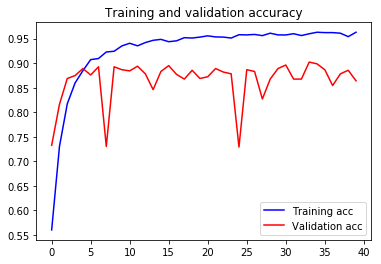

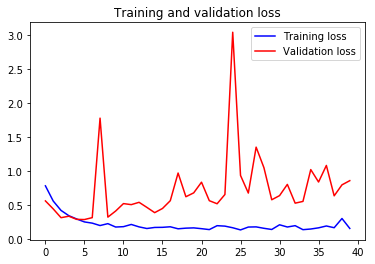

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('da_last7_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()